# IMPORTING LIBRARIES

In [117]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics

# LOADING DATA

In [118]:
DIAMONDS = pd.read_csv("train555.csv")
DIAMONDS.head(15)

Id  carat        cut color clarity  depth  table  price     x     y     z
0    1   1.06      Ideal     I     SI2   61.8   57.0   4270  6.57  6.60  4.07
1    2   1.51    Premium     G    VVS2   60.9   58.0  15164  7.38  7.42  4.51
2    3   0.32      Ideal     F     VS2   61.3   56.0    828  4.43  4.41  2.71
3    4   0.53      Ideal     G     VS2   61.2   56.0   1577  5.19  5.22  3.19
4    5   0.70    Premium     H    VVS2   61.0   57.0   2596  5.76  5.72  3.50
5    6   0.90  Very Good     G      IF   63.1   58.0   5670  6.18  6.09  3.87
6    7   0.71  Very Good     F     VS1   61.8   60.0   3017  5.66  5.70  3.51
7    8   0.70      Ideal     F     SI1   61.3   57.0   2288  5.72  5.77  3.52
8    9   0.59      Ideal     D     VS1   60.9   56.0   2175  5.39  5.44  3.30
9   10   0.31  Very Good     G    VVS1   59.8   62.0    761  4.35  4.41  2.62
10  11   0.43      Ideal     E     SI1   61.2   56.2    803  4.87  4.89  2.99
11  12   0.70      Ideal     F     SI2   62.0   55.0   2259  5.69  5.73  3.54
12  13   1.30    Premium     H     VS1   61.5   58.0   7855  6.98  6.96  4.29
13  14   0.33    Premium     I     VS2   60.6   58.0    594  4.47  4.44  2.70
14  15   0.85      Ideal     H     SI1   60.8   57.0   3183  6.13  6.18  3.74

In [119]:
DIAMONDS.shape

(43152, 11)

# DATA PREPROCESSING

In [120]:
DIAMONDS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       43152 non-null  int64  
 1   carat    43152 non-null  float64
 2   cut      43152 non-null  object 
 3   color    43152 non-null  object 
 4   clarity  43152 non-null  object 
 5   depth    43152 non-null  float64
 6   table    43152 non-null  float64
 7   price    43152 non-null  int64  
 8   x        43152 non-null  float64
 9   y        43152 non-null  float64
 10  z        43152 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.6+ MB


In [121]:
#The first column seems to be just index
DIAMONDS = DIAMONDS.drop(["Id"], axis=1)
DIAMONDS.describe()

carat         depth         table         price             x  \
count  43152.000000  43152.000000  43152.000000  43152.000000  43152.000000   
mean       0.797855     61.747177     57.458347   3929.491912      5.731568   
std        0.473594      1.435454      2.233904   3985.527795      1.121279   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    947.750000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5312.000000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  43152.000000  43152.000000  
mean       5.735018      3.538568  
std        1.148809      0.708238  
min        0.000000      0.000000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.040000  
max       58.900000     31.800000

In [122]:
#Dropping dimentionless diamonds
DIAMONDS= DIAMONDS.drop(DIAMONDS[DIAMONDS["x"]==0].index)
DIAMONDS = DIAMONDS.drop(DIAMONDS[DIAMONDS["y"]==0].index)
DIAMONDS = DIAMONDS.drop(DIAMONDS[DIAMONDS["z"]==0].index)
DIAMONDS.shape

(43135, 10)

we lost 17 data points by deleting the dimensionless(2-D or 1-D) diamonds.

# PAIRPLOT OF DATA

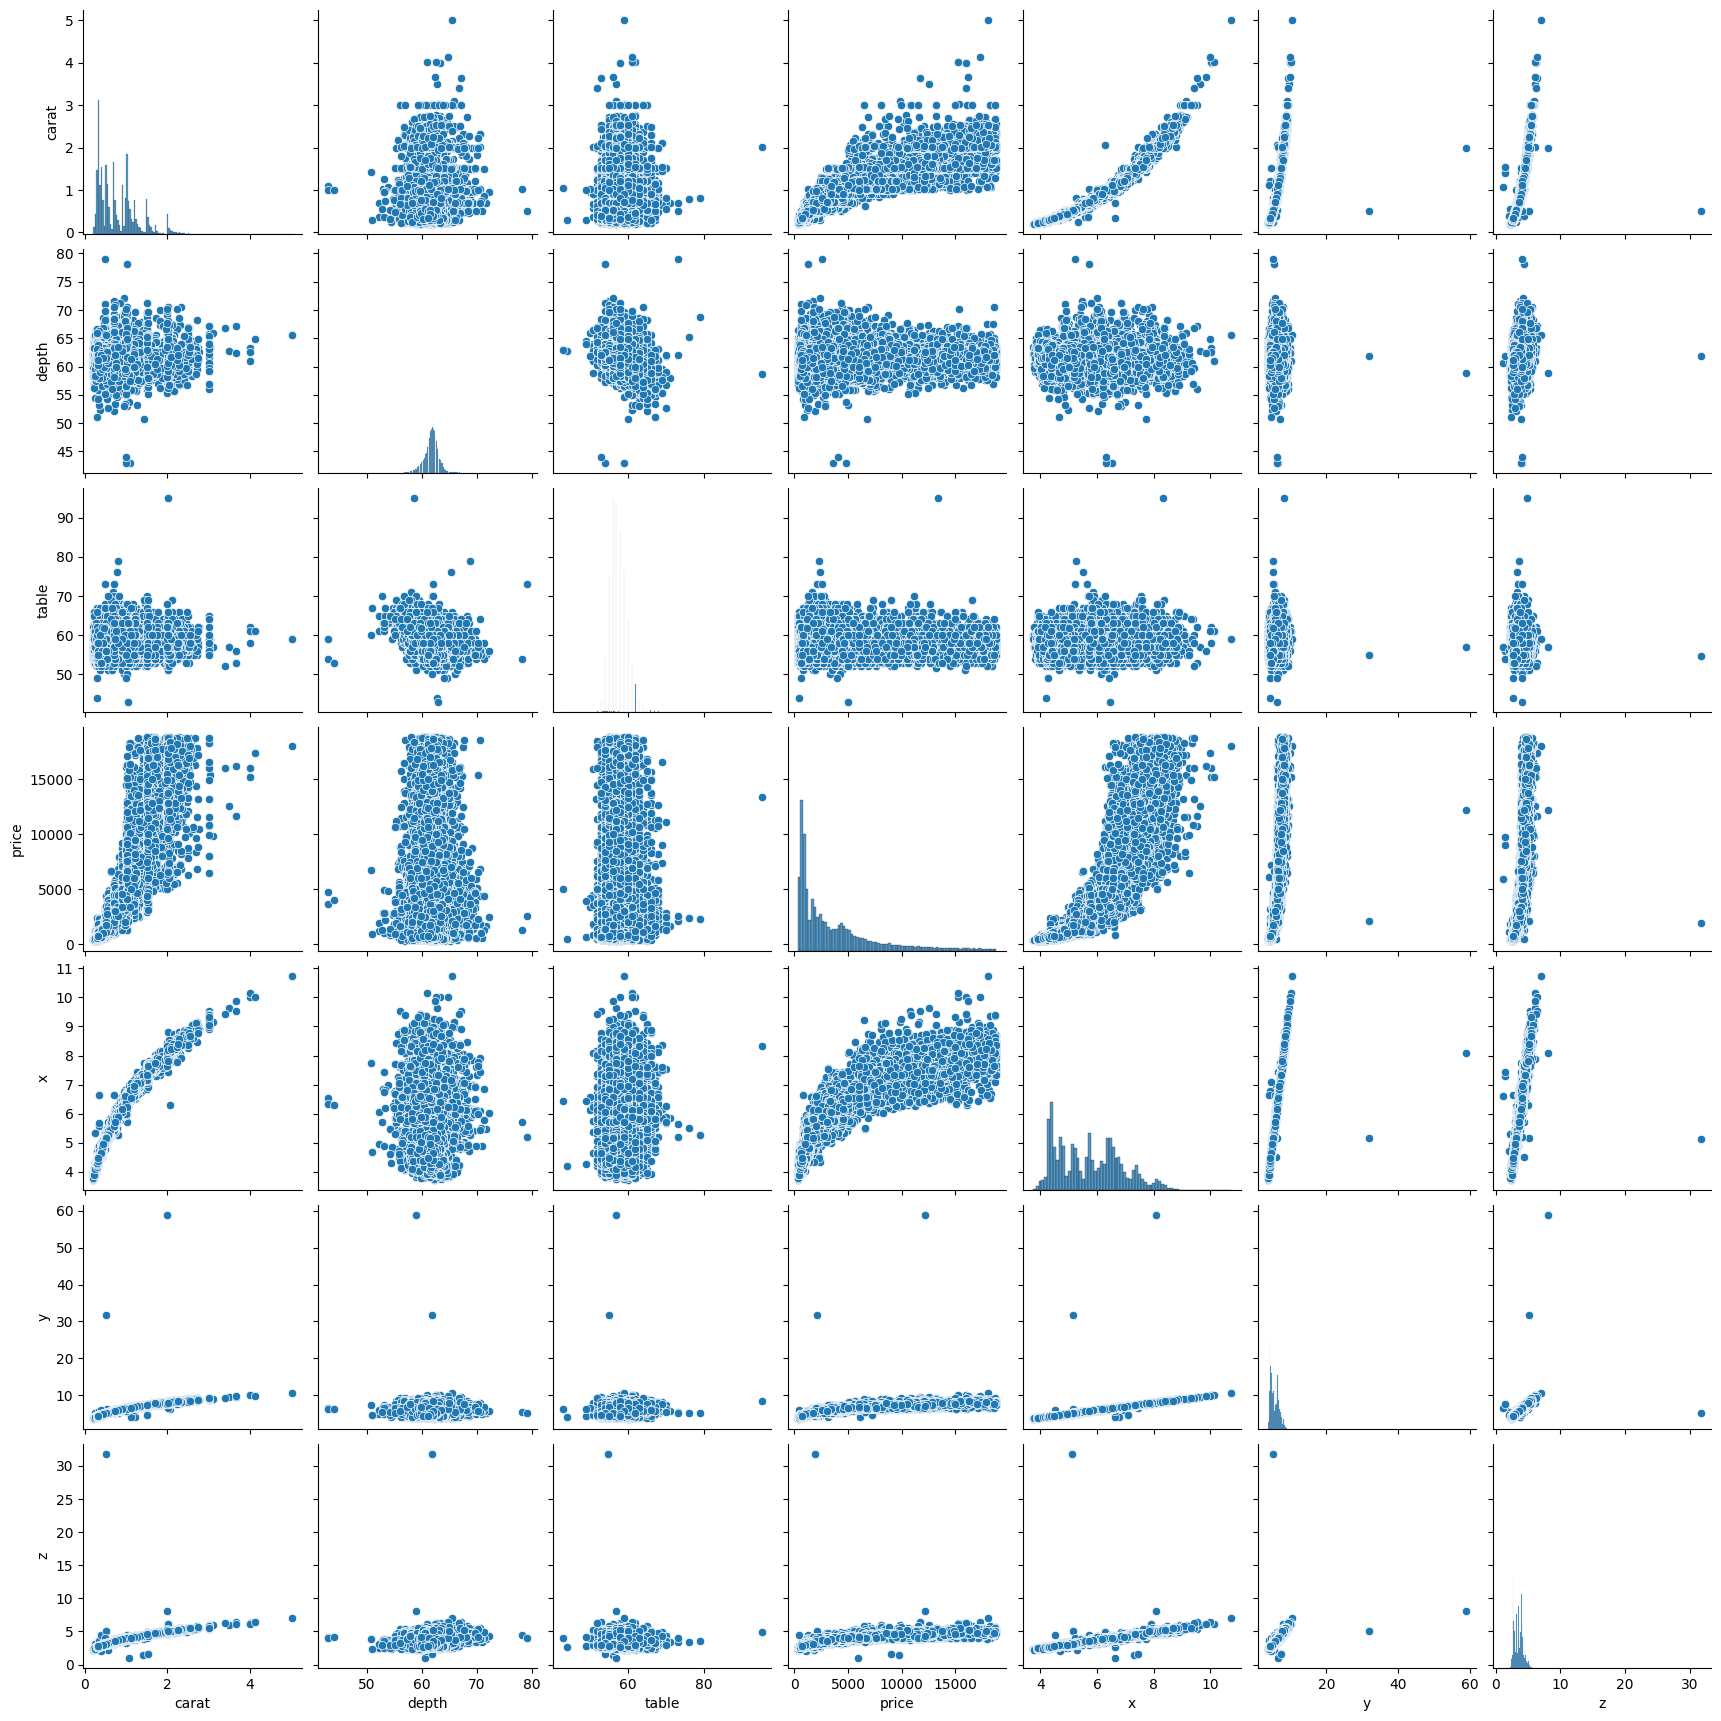

In [123]:
sns.pairplot(DIAMONDS)

# OUTLIERS ANALYSIS

CARAT VESUS PRICE

<Axes: xlabel='carat', ylabel='price'>

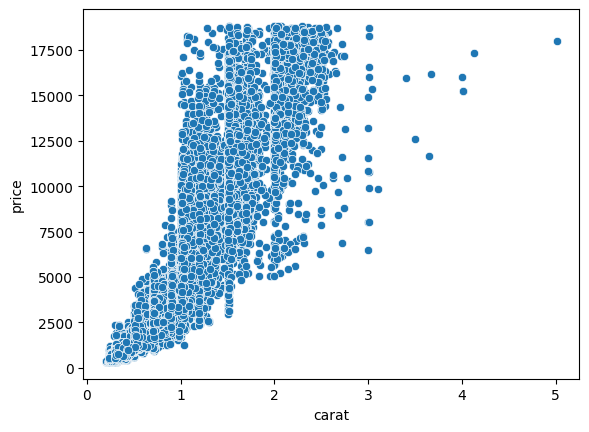

In [124]:
sns.scatterplot(x=DIAMONDS["carat"], y=DIAMONDS["price"])

In [125]:
DIAMONDS[DIAMONDS["carat"]>4]

carat      cut color clarity  depth  table  price      x      y     z
18840   4.01  Premium     J      I1   62.5   62.0  15223  10.02   9.94  6.24
26030   4.01  Premium     I      I1   61.0   61.0  15223  10.14  10.10  6.17
26886   5.01     Fair     J      I1   65.5   59.0  18018  10.74  10.54  6.98
31151   4.13     Fair     H      I1   64.8   61.0  17329  10.00   9.85  6.43

X VESUS PRICE

<Axes: xlabel='x', ylabel='price'>

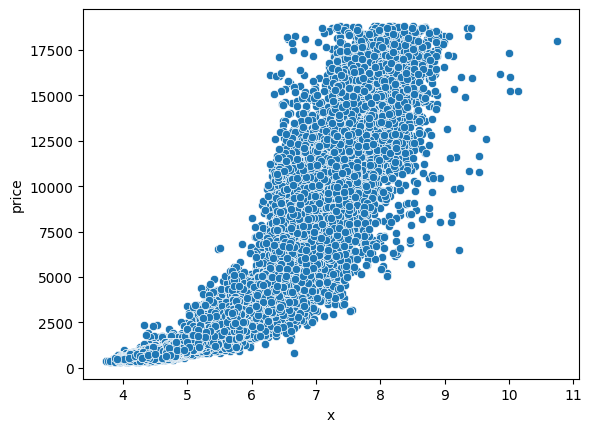

In [126]:
sns.scatterplot(x=DIAMONDS["x"], y=DIAMONDS["price"])

In [127]:
DIAMONDS[DIAMONDS["x"]>10]

carat        cut color clarity  depth  table  price      x      y     z
7389    4.00  Very Good     I      I1   63.3   58.0  15984  10.01   9.94  6.31
18840   4.01    Premium     J      I1   62.5   62.0  15223  10.02   9.94  6.24
26030   4.01    Premium     I      I1   61.0   61.0  15223  10.14  10.10  6.17
26886   5.01       Fair     J      I1   65.5   59.0  18018  10.74  10.54  6.98

Y VESUS PRICE

<Axes: xlabel='y', ylabel='price'>

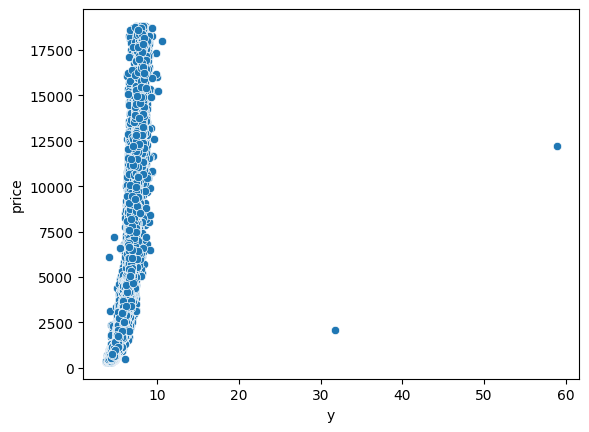

In [128]:
sns.scatterplot(x=DIAMONDS["y"], y=DIAMONDS["price"])

In [130]:
DIAMONDS[DIAMONDS["y"]>30]

carat      cut color clarity  depth  table  price     x     y     z
35359   2.00  Premium     H     SI2   58.9   57.0  12210  8.09  58.9  8.06
40663   0.51    Ideal     E     VS1   61.8   55.0   2075  5.15  31.8  5.12

Z VESUS PRICE

<Axes: xlabel='z', ylabel='price'>

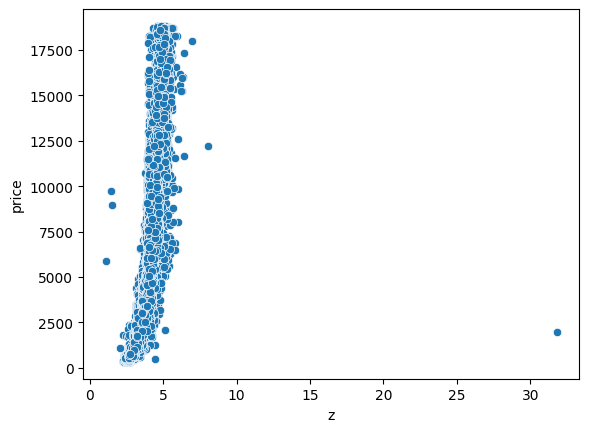

In [131]:
sns.scatterplot(x=DIAMONDS["z"], y=DIAMONDS["price"])

In [141]:
DIAMONDS[DIAMONDS["z"]>30]

carat        cut color clarity  depth  table  price     x     y     z
10541   0.51  Very Good     E     VS1   61.8   54.7   1970  5.12  5.15  31.8

DEPTH VESUS PRICE

<Axes: xlabel='depth', ylabel='price'>

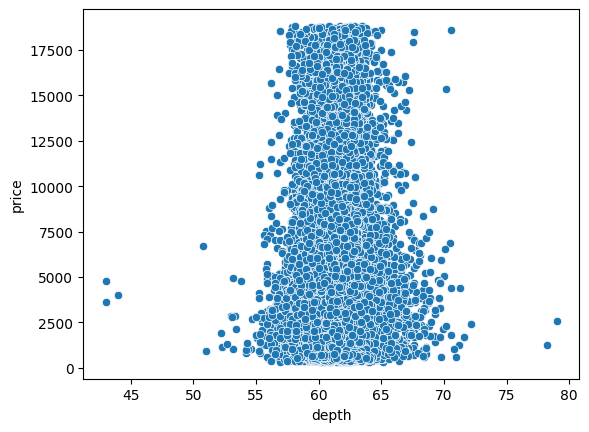

In [142]:
sns.scatterplot(x=DIAMONDS["depth"], y=DIAMONDS["price"])

In [150]:
DIAMONDS[(DIAMONDS["depth"] > 75) ]

carat   cut color clarity  depth  table  price     x     y     z
27567   1.03  Fair     E      I1   78.2   54.0   1262  5.72  5.59  4.42
40895   0.50  Fair     E     VS2   79.0   73.0   2579  5.21  5.18  4.09

In [151]:
DIAMONDS[(DIAMONDS["depth"] < 50)]

carat    cut color clarity  depth  table  price     x     y     z
3476    1.09  Ideal     J     VS2   43.0   54.0   4778  6.53  6.55  4.12
29942   1.00   Fair     G     SI1   43.0   59.0   3634  6.32  6.27  3.97
39393   1.00   Fair     G     VS2   44.0   53.0   4032  6.31  6.24  4.12

TABLE VESUS PRICE

<Axes: xlabel='table', ylabel='price'>

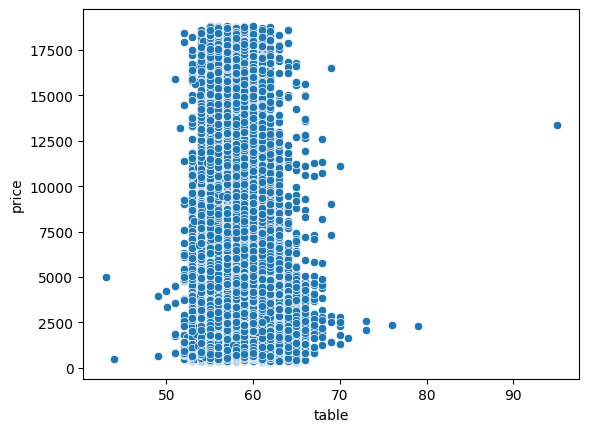

In [152]:
sns.scatterplot(x=DIAMONDS["table"], y=DIAMONDS["price"])

In [161]:
DIAMONDS[DIAMONDS["table"]>80]

carat   cut color clarity  depth  table  price     x     y     z
32829   2.01  Fair     F     SI1   58.6   95.0  13387  8.32  8.31  4.87

In [164]:
DIAMONDS[(DIAMONDS["table"] < 50)]

carat        cut color clarity  depth  table  price     x     y     z
11343   0.30       Fair     E     SI1   64.5   49.0    630  4.28  4.25  2.75
26907   0.29  Very Good     E     VS1   62.8   44.0    474  4.20  4.24  2.65
37011   1.04      Ideal     I     VS1   62.9   43.0   4997  6.45  6.41  4.04
42813   1.00       Fair     I     VS1   64.0   49.0   3951  6.43  6.39  4.10

DELETE OUTLIERS

In [167]:
#Dropping the outliers. 
DIAMONDS = DIAMONDS[(DIAMONDS["depth"]<75)&(DIAMONDS["depth"]>50)]
DIAMONDS= DIAMONDS[(DIAMONDS["table"]<80)&(DIAMONDS["table"]>50)]
DIAMONDS = DIAMONDS[(DIAMONDS["x"]<10)]
DIAMONDS = DIAMONDS[(DIAMONDS["y"]<30)]
DIAMONDS = DIAMONDS[(DIAMONDS["z"]<30)]
DIAMONDS.shape

(43089, 10)

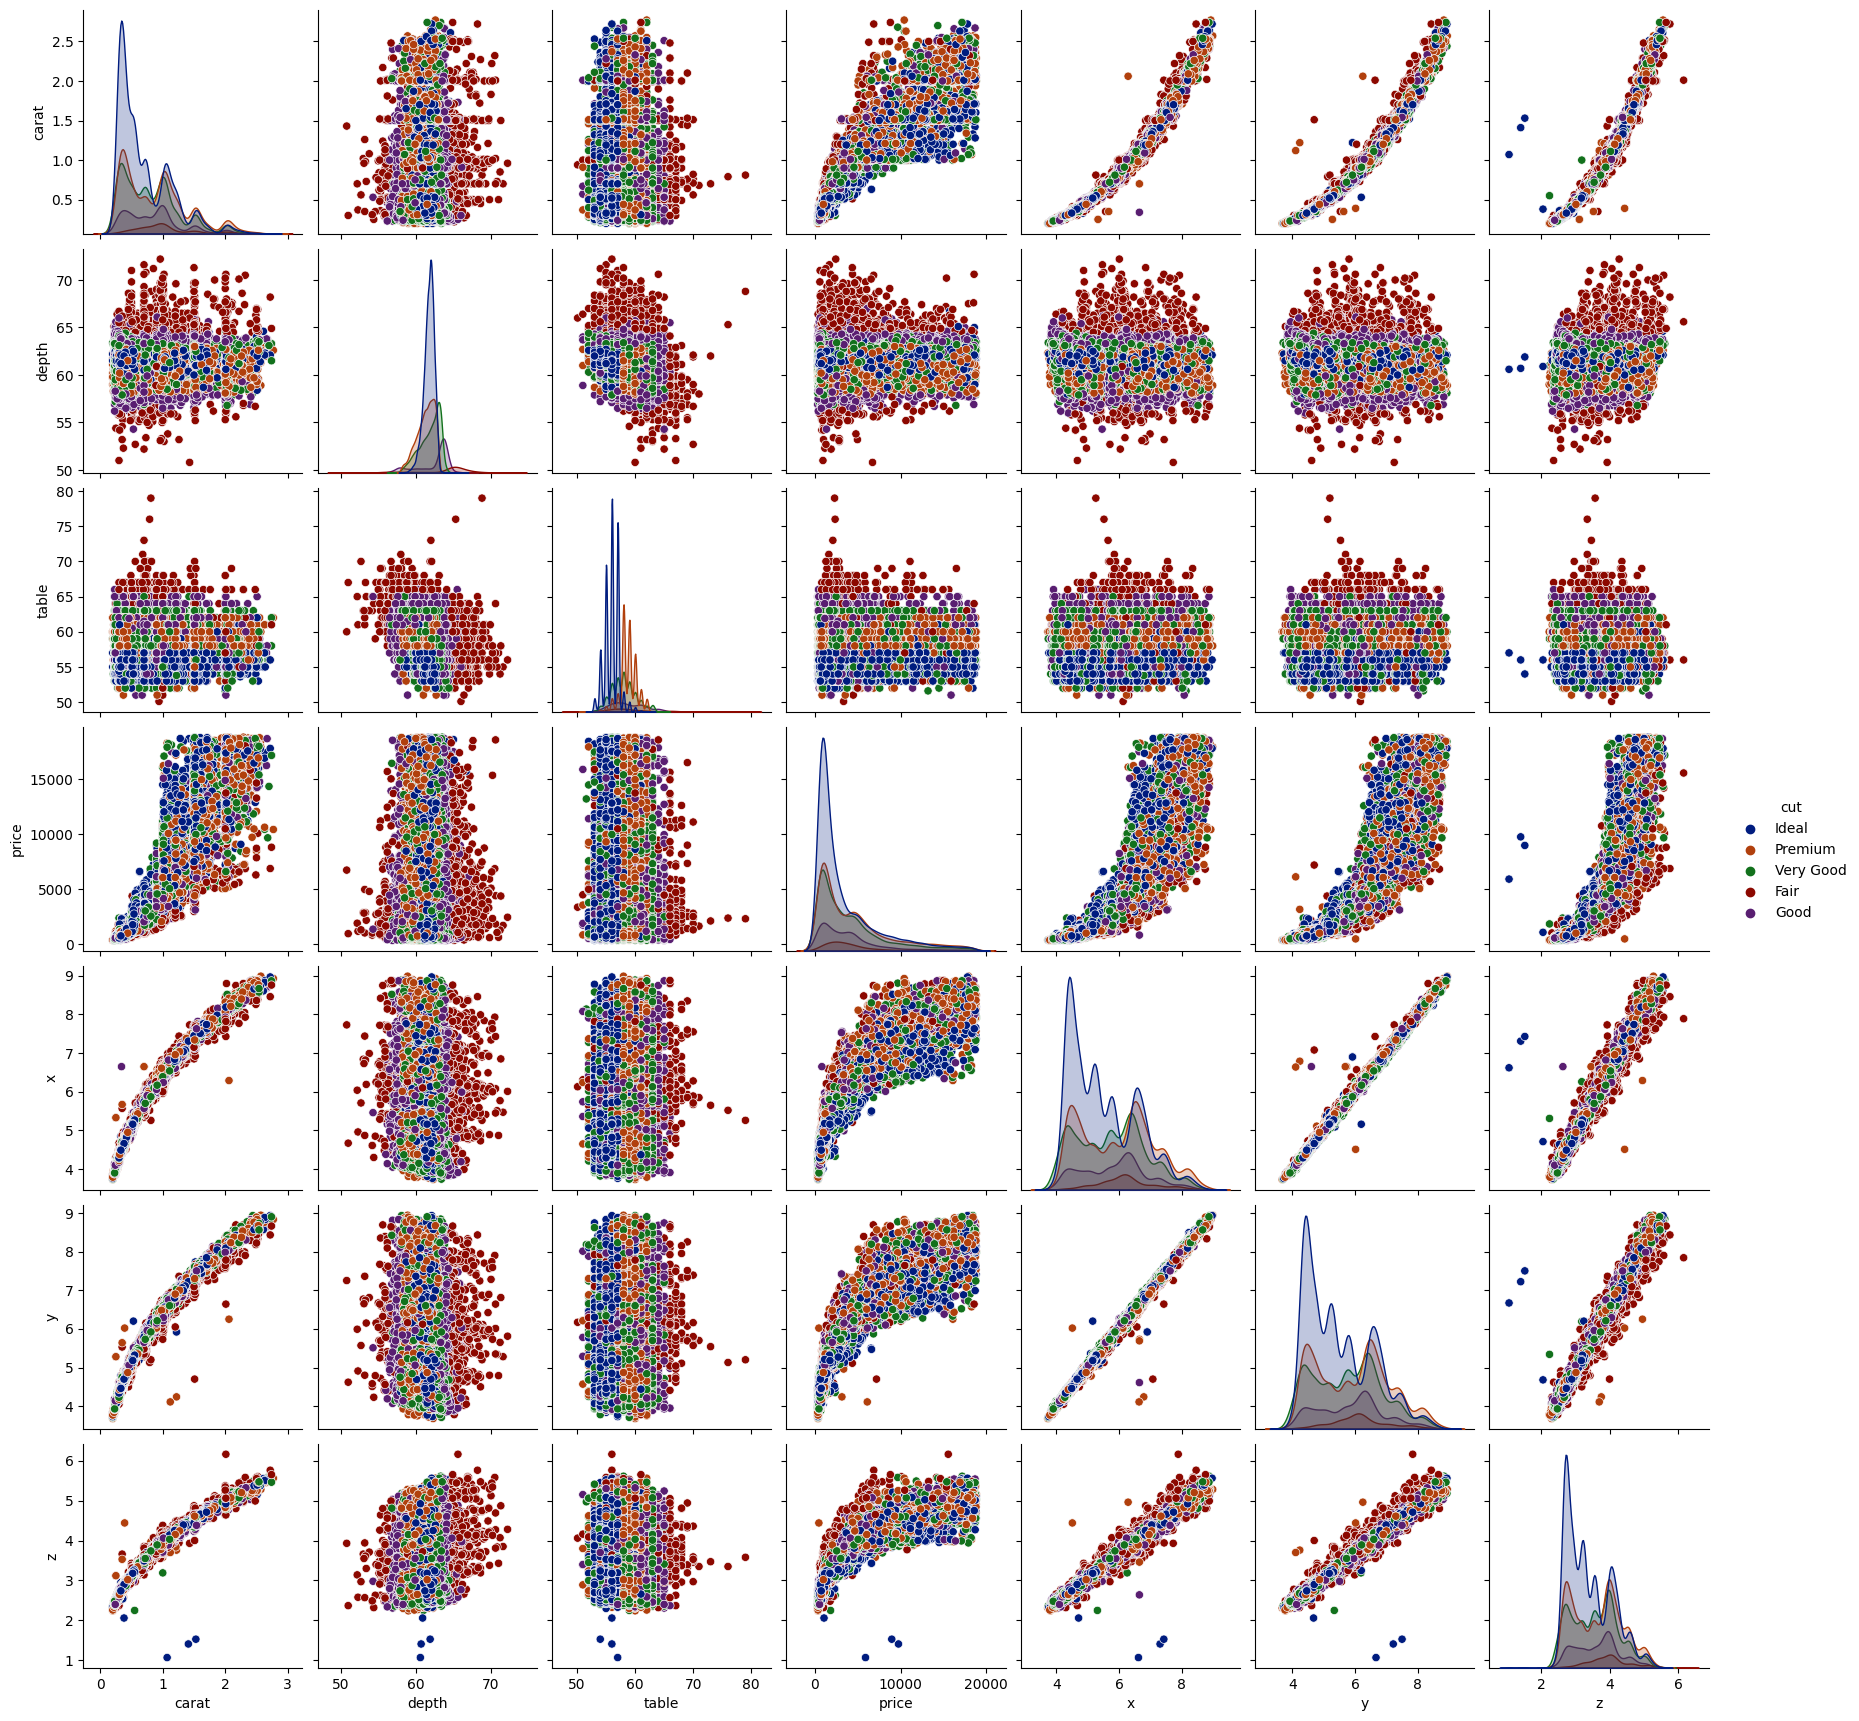

In [170]:
ax=sns.pairplot(DIAMONDS, hue= "cut",palette="dark")

In [171]:
DIAMONDS.corr()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_22216\4199885855.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  DIAMONDS.corr()


carat     depth     table     price         x         y         z
carat  1.000000  0.023260  0.182852  0.923940  0.979126  0.978331  0.977597
depth  0.023260  1.000000 -0.308020 -0.013515 -0.029922 -0.032661  0.092815
table  0.182852 -0.308020  1.000000  0.127525  0.197845  0.191532  0.156398
price  0.923940 -0.013515  0.127525  1.000000  0.886884  0.888587  0.881963
x      0.979126 -0.029922  0.197845  0.886884  1.000000  0.998631  0.990972
y      0.978331 -0.032661  0.191532  0.888587  0.998631  1.000000  0.990647
z      0.977597  0.092815  0.156398  0.881963  0.990972  0.990647  1.000000

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_22216\1384275935.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(DIAMONDS.corr(), annot=True)


<Axes: >

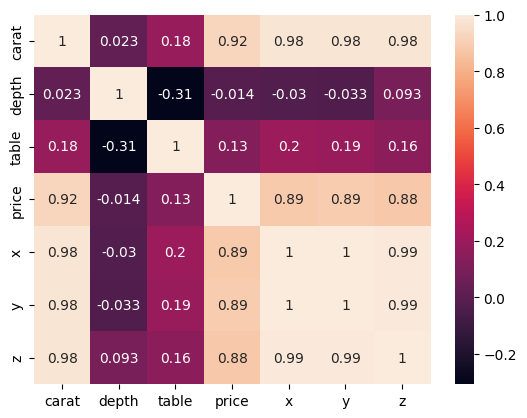

In [172]:
sns.heatmap(DIAMONDS.corr(), annot=True)

# CATEGORICAL DATA

In [174]:
# Get list of categorical variables
s = (DIAMONDS.dtypes =="object")
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
['cut', 'color', 'clarity']


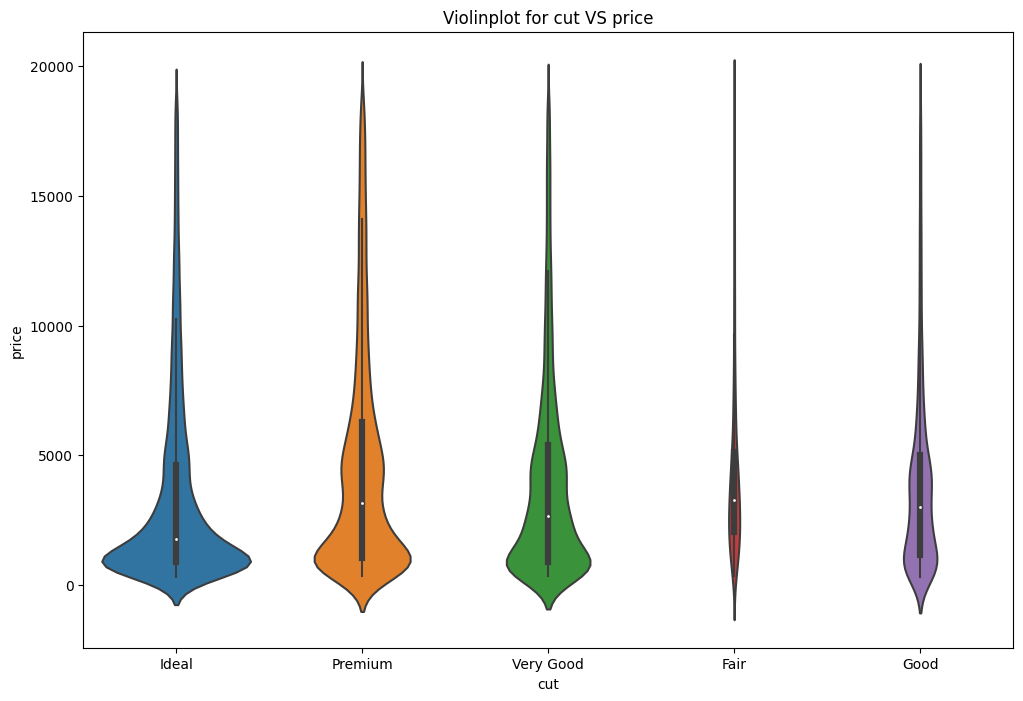

In [179]:
plt.figure(figsize=(12, 8))
ax = sns.violinplot(x='cut', y='price', data=DIAMONDS, scale='count')
ax.set_title('Violinplot for cut VS price')
plt.show()

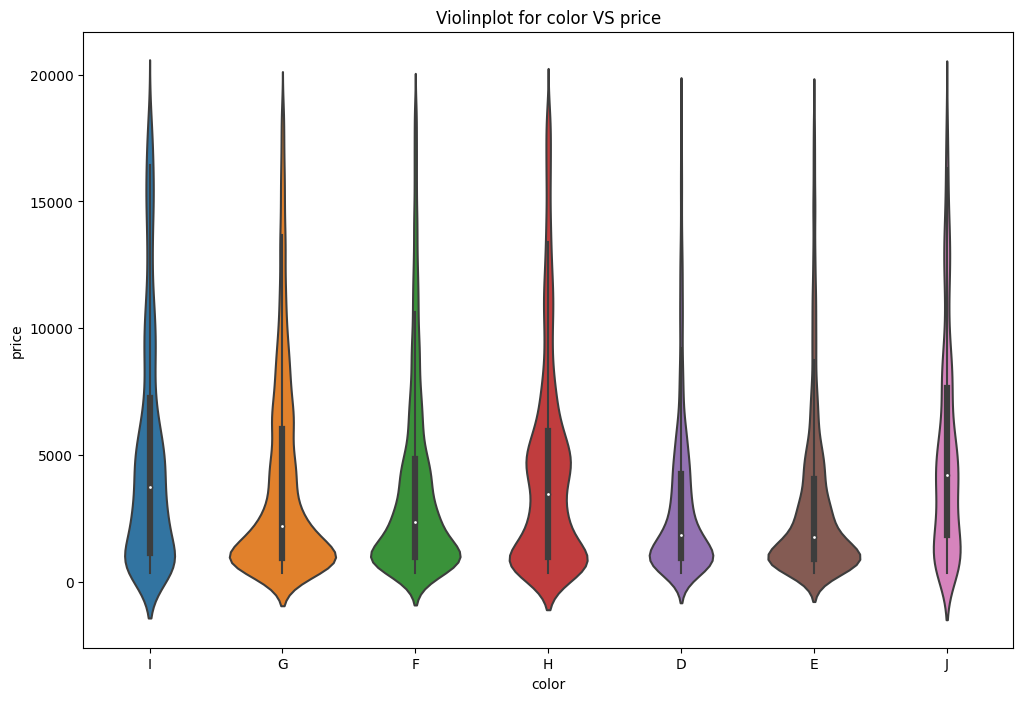

In [181]:
plt.figure(figsize=(12,8))
ax = sns.violinplot(x='color',y='price',data=DIAMONDS,scale='count')
ax.set_title('Violinplot for color VS price')
plt.show()

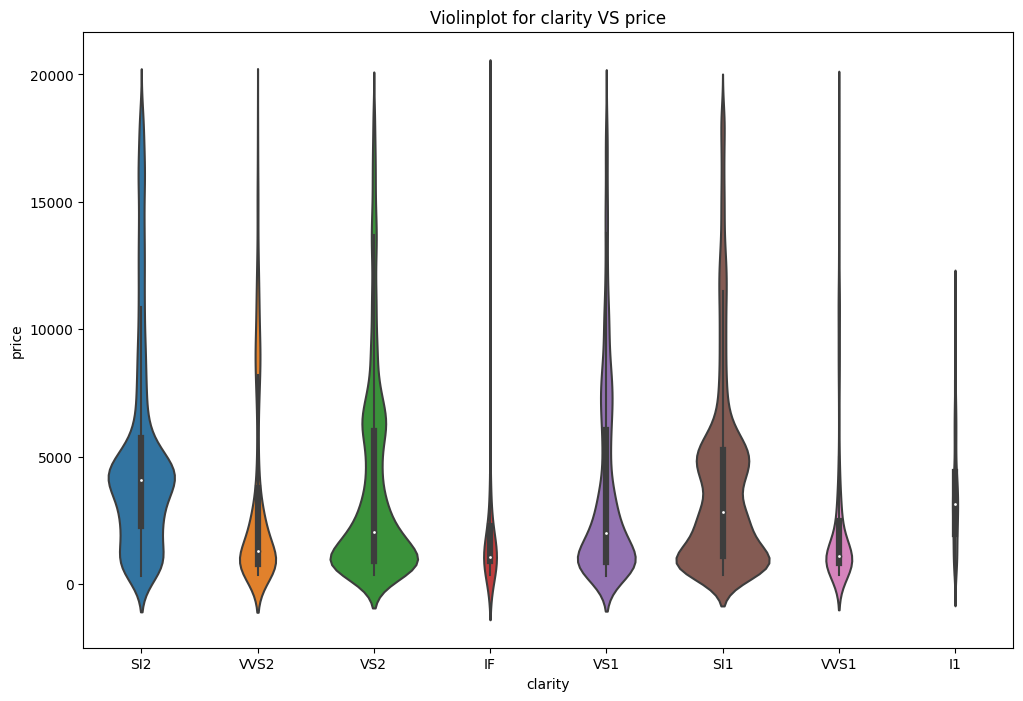

In [182]:
plt.figure(figsize=(12,8))
ax = sns.violinplot(x='clarity',y='price',data=DIAMONDS,scale='count')
ax.set_title('Violinplot for clarity VS price')
plt.show()

Lable encoding the data to get rid of object dtype

In [183]:
# Make copy to avoid changing original data 
label_data = DIAMONDS.copy()

# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in object_cols:
    label_data[col] = label_encoder.fit_transform(label_data[col])
label_data.head()

carat  cut  color  clarity  depth  table  price     x     y     z
0   1.06    2      5        3   61.8   57.0   4270  6.57  6.60  4.07
1   1.51    3      3        7   60.9   58.0  15164  7.38  7.42  4.51
2   0.32    2      2        5   61.3   56.0    828  4.43  4.41  2.71
3   0.53    2      3        5   61.2   56.0   1577  5.19  5.22  3.19
4   0.70    3      4        7   61.0   57.0   2596  5.76  5.72  3.50

In [184]:
DIAMONDS.describe()

carat         depth         table         price             x  \
count  43089.000000  43089.000000  43089.000000  43089.000000  43089.000000   
mean       0.795728     61.747483     57.457353   3920.034301      5.728928   
std        0.468632      1.420463      2.220898   3974.123190      1.115187   
min        0.200000     50.800000     50.100000    326.000000      3.730000   
25%        0.400000     61.000000     56.000000    946.000000      4.710000   
50%        0.700000     61.800000     57.000000   2399.000000      5.690000   
75%        1.040000     62.500000     59.000000   5301.000000      6.540000   
max        2.770000     72.200000     79.000000  18823.000000      8.990000   

                  y             z  
count  43089.000000  43089.000000  
mean       5.730524      3.537370  
std        1.107389      0.688618  
min        3.680000      1.070000  
25%        4.720000      2.910000  
50%        5.710000      3.520000  
75%        6.530000      4.030000  
max        8.940000      6.160000

<Axes: >

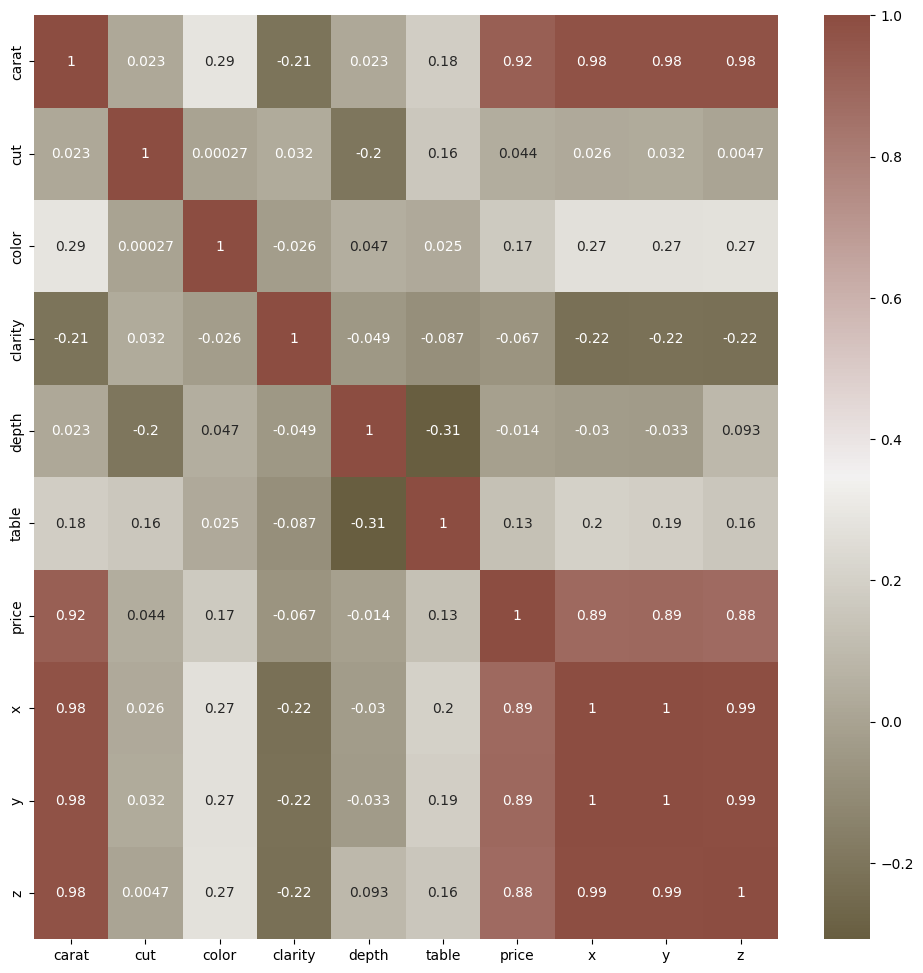

In [185]:
#correlation matrix
cmap = sns.diverging_palette(70,20,s=50, l=40, n=6,as_cmap=True)
corrmat= label_data.corr()
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corrmat,cmap=cmap,annot=True, )

# MODEL BUILDING

In [186]:
# Assigning the featurs as X and trarget as y
X= label_data.drop(["price"],axis =1)
y= label_data["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=7)

In [187]:
# Building pipelins of standard scaler and model for varios regressors.

pipeline_lr=Pipeline([("scalar1",StandardScaler()),
                     ("lr_classifier",LinearRegression())])

pipeline_dt=Pipeline([("scalar2",StandardScaler()),
                     ("dt_classifier",DecisionTreeRegressor())])

pipeline_rf=Pipeline([("scalar3",StandardScaler()),
                     ("rf_classifier",RandomForestRegressor())])
pipeline_kn=Pipeline([("scalar4",StandardScaler()),
                     ("rf_classifier",KNeighborsRegressor())])


pipeline_xgb=Pipeline([("scalar5",StandardScaler()),
                     ("rf_classifier",XGBRegressor())])

# List of all the pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_kn, pipeline_xgb]

# Dictionary of pipelines and model types for ease of reference
pipe_dict = {0: "LinearRegression", 1: "DecisionTree", 2: "RandomForest",3: "KNeighbors", 4: "XGBRegressor"}
# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

In [188]:
cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train,scoring="neg_root_mean_squared_error", cv=10)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

LinearRegression: -1298.309126 
DecisionTree: -759.259823 
RandomForest: -556.961967 
KNeighbors: -842.494067 
XGBRegressor: -544.740556 


# TESTING THE MODEL WITH THE BEST SCORE ON THE TEST SET

In [189]:
# Model prediction on test data
pred = pipeline_xgb.predict(X_test)

In [190]:
# Model Evaluation
print("R^2:",metrics.r2_score(y_test, pred))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, pred))
print("MSE:",metrics.mean_squared_error(y_test, pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

R^2: 0.9806072083599789
Adjusted R^2: 0.9805909921447267
MAE: 284.37637765066967
MSE: 305388.0688811725
RMSE: 552.6192802293207


In [191]:
test=pd.read_csv('test555.csv')

In [192]:
test.head()

Id  carat        cut color clarity  depth  table     x     y     z
0   1   0.34      Ideal     G    VVS2   61.1   57.0  4.52  4.48  2.75
1   2   0.71    Premium     E     VS2   62.7   58.0  5.74  5.68  3.58
2   3   0.44  Very Good     I     VS1   62.8   56.0  4.83  4.88  3.05
3   4   0.81    Premium     E     SI2   60.1   59.0  6.09  6.03  3.65
4   5   0.40      Ideal     G    VVS1   61.2   56.0  4.74  4.80  2.92

In [193]:
# Define the order of the categories
color_order = ['D', 'E', 'F', 'G', 'H', 'I', 'J']
cut_order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
clarity_order = ['I1', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2', 'IF']

# Map the ordered categories to numerical values
test['color'] = test['color'].map({k: i for i, k in enumerate(color_order)})
test['cut'] = test['cut'].map({k: i for i, k in enumerate(cut_order)})
test['clarity'] = test['clarity'].map({k: i for i, k in enumerate(clarity_order)})

In [195]:
Id=test['Id']

In [196]:
pred =pipeline_xgb.predict(test.drop('Id',axis=1))
data={'Id': Id, 'price':pred }
sub = pd.DataFrame(data=data)

In [197]:
sub

Id         price
0          1    868.479553
1          2   3029.450195
2          3    550.457581
3          4   3174.766846
4          5    781.248291
...      ...           ...
10783  10784   1121.310547
10784  10785   6991.414062
10785  10786   2983.557129
10786  10787   5834.740723
10787  10788  15742.992188

[10788 rows x 2 columns]

In [198]:
sub.to_csv('SUBLAST.csv',index=False)